<a href="https://colab.research.google.com/github/RuthlessActuary2023/CAS-RPM-2026-Workshop-Functional-Intro-Python/blob/main/CARFAX_Intro_to_Python_Lesson_3_Intermediate_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Intermediate Pandas Data Analysis

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",25)
pd.set_option("display.max_rows",250)
pd.options.display.float_format = '{:,.2f}'.format

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## Import the feather with our last completed dataset

In [2]:
# Code to clone the github repo into colab
!pip install gitpython
import git
import os

repo_url = 'https://github.com/RuthlessActuary2023/CAS-RPM-2025-Python-Workshop.git'
repo_dir = '/content/your-repo'

# Clone if it doesn’t already exist
if not os.path.exists(repo_dir):
    git.Repo.clone_from(repo_url, repo_dir)

In [3]:
repo_dir = '/content/your-repo'
data4 = pd.read_feather(repo_dir + '/data4.ftr')

## Make a copy that we can edit

In [4]:
data5 = data4.copy()

## View the column names in data5

In [ ]:
[i for i in data5]

## View Shape of data5

In [6]:
data5.shape

(100443, 81)

## View first 5 records of data5

In [7]:
data5.head()

,pol_eff_year,ep_bi,ep_col,ee_bi,ee_col,incloss_bi,incloss_col,cc_bi,cc_col,modelyear,zip,pol_id,...,Odometer_Problem_flag,EML_or_NAM_flag,Rollback_flag,Repossession_flag,CPO_flag,Safety_Failed_flag,Recycler_Inv_flag,Scrapped_flag,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile
0,2015,161.00,419.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,False,False,False,False,False,False,False,False,26.00,52.00,58.00,51.00
1,2017,269.00,416.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,False,False,False,False,False,False,False,False,26.00,52.00,58.00,51.00
2,2014,105.57,315.06,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,False,False,False,False,False,False,False,False,26.00,52.00,58.00,51.00
3,2016,258.00,425.00,1.00,1.00,0.00,0.00,0,0,"2,010.00",45424,0,...,False,False,False,False,False,False,False,False,26.00,52.00,58.00,51.00
4,2014,23.83,55.72,0.17,0.17,0.00,0.00,0,0,"2,007.00",45424,0,...,False,False,False,False,False,False,False,False,26.00,52.00,58.00,51.00


## Below is code for some easy built in visualization to view a distribution with .hist()

<Axes: >

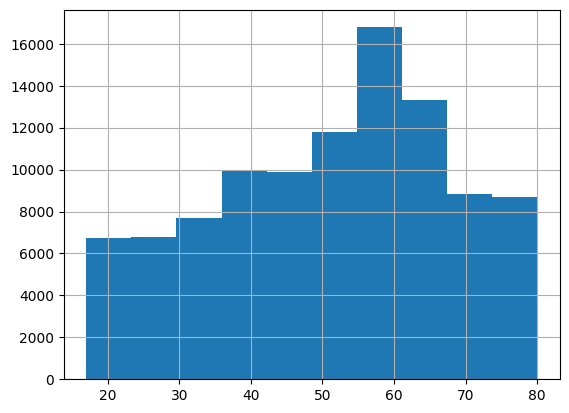

In [8]:
data5['DrvAge_box'].hist()

## You can also change the number of bins shown in the histogram - let's choose 25

<Axes: >

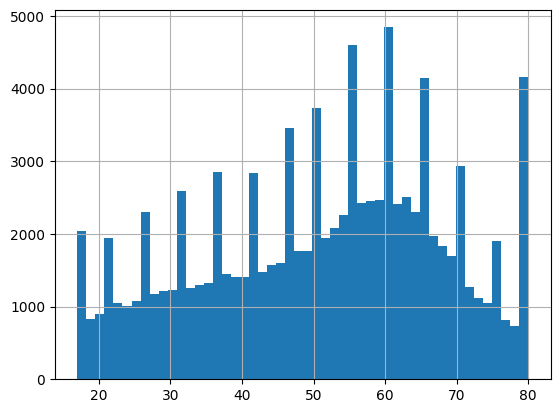

In [9]:
data5['DrvAge_box'].hist(bins = 50)

## Let's get a general idea of the distribution of percentiles for the Driver Age variable

In [ ]:
for q in [0,.10,.25,.50,.75,.90,.95,.99,1]:
  print(str(q) + ': ' + str(data5['DrvAge_box'].quantile(q)))

0: 17.0
0.1: 27.0
0.25: 38.0
0.5: 53.0
0.75: 64.0
0.9: 72.0
0.95: 77.0
0.99: 80.0
1: 80.0


## Let's create a new column for Driver Age Buckets

In [ ]:
data5['DrvAge_bucket'] = 'A:<21'
nxt = data5['DrvAge_box'] >= 20
data5.loc[nxt,'DrvAge_bucket'] = 'B:21-30'
nxt = data5['DrvAge_box'] >= 30
data5.loc[nxt,'DrvAge_bucket'] = 'C:31-40'
nxt = data5['DrvAge_box'] >= 40
data5.loc[nxt,'DrvAge_bucket'] = 'D:41-50'
nxt = data5['DrvAge_box'] >= 50
data5.loc[nxt,'DrvAge_bucket'] = 'E:51-60'
nxt = data5['DrvAge_box'] >= 60
data5.loc[nxt,'DrvAge_bucket'] = 'F:61-70'
nxt = data5['DrvAge_box'] >= 70
data5.loc[nxt,'DrvAge_bucket'] = 'G:71+'

## Check to make sure the assignments are correct by pulling a random sample of 50

In [ ]:
cols = ["DrvAge_box", "DrvAge_bucket"]
check = data5[cols]

check.sample(n=50)

,DrvAge_box,DrvAge_bucket
96407,58,E:51-60
22621,28,B:21-30
341,28,B:21-30
57201,53,E:51-60
76143,55,E:51-60
20865,31,C:31-40
39581,62,F:61-70
59903,65,F:61-70
97922,42,D:41-50
27589,49,D:41-50


## Let's see how the distribution looks

<Axes: >

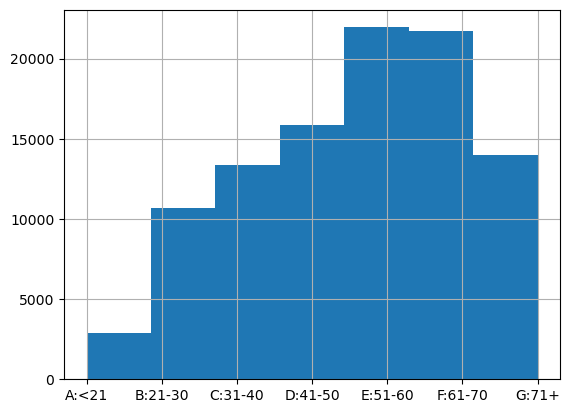

In [ ]:
data5 = data5.sort_values('DrvAge_bucket')

data5['DrvAge_bucket'].hist(bins = 7)

## Let's make a pivot table showing BI premium by Driver Age buckets and Driver Count

In [ ]:
data5.pivot_table(index = 'DrvAge_bucket', columns = 'driver_count_box', values = 'ep_bi')

driver_count_box,1,2,3,4
DrvAge_bucket,,,,
A:<21,242.87,187.90,158.53,205.03
B:21-30,140.87,105.89,115.39,148.45
C:31-40,106.36,80.47,130.97,153.15
D:41-50,100.05,87.31,135.23,174.40
E:51-60,82.59,73.82,106.28,141.34
F:61-70,84.81,70.64,95.07,121.27
G:71+,99.35,85.62,111.26,148.09


## Suppose you want to use this other than just for display and want pretty columns

In [ ]:
pvt = data5.pivot_table(index = 'DrvAge_bucket', columns = 'driver_count_box', values = 'ep_bi').reset_index()

pvt

driver_count_box,DrvAge_bucket,1,2,3,4
0,A:<21,242.87,187.90,158.53,205.03
1,B:21-30,140.87,105.89,115.39,148.45
2,C:31-40,106.36,80.47,130.97,153.15
3,D:41-50,100.05,87.31,135.23,174.40
4,E:51-60,82.59,73.82,106.28,141.34
5,F:61-70,84.81,70.64,95.07,121.27
6,G:71+,99.35,85.62,111.26,148.09


In [ ]:
[i for i in pvt]

['DrvAge_bucket', 1, 2, 3, 4]

## Change the names of the columns

In [ ]:
for col in [1, 2, 3, 4]:
    pvt.rename(columns = {col: 'Drvr_Ct_' + str(int(col))}, inplace = True)
pvt

driver_count_box,DrvAge_bucket,Drvr_Ct_1,Drvr_Ct_2,Drvr_Ct_3,Drvr_Ct_4
0,A:<21,242.87,187.90,158.53,205.03
1,B:21-30,140.87,105.89,115.39,148.45
2,C:31-40,106.36,80.47,130.97,153.15
3,D:41-50,100.05,87.31,135.23,174.40
4,E:51-60,82.59,73.82,106.28,141.34
5,F:61-70,84.81,70.64,95.07,121.27
6,G:71+,99.35,85.62,111.26,148.09


## Let's also look at the correlation matrix of the data

In [ ]:
corr = data5.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,perslimbi,acclimbi,pol_eff_year,ep_bi,ep_col,ee_bi,ee_col,incloss_bi,incloss_col,cc_bi,cc_col,zip,pol_id,vin_id,credit,commute_flag,veh_count_box,driver_count_box,veh_age,coll_symb_ntile,ded_coll,DrvAge_box,male,single,widowed,Modeled_Annual_Mileage,Estimated_Current_Mileage,Annual_Mileage_Estimate,Number_of_Titling_Transactions,LOO_years,curr_owner_odo_cnt,all_owner_odo_cnt,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile
perslimbi,1.000000,0.788895,0.014516,0.041865,-0.053049,0.074839,0.074839,-0.000019,-0.004147,-0.010129,-0.013488,-0.012274,-0.028738,-0.029510,-0.209522,-0.035392,0.095713,0.111687,-0.072067,0.037557,0.071787,0.083370,0.007747,-0.095777,0.014213,-0.000410,0.009958,0.041781,-0.032633,-0.000374,0.060334,-0.044770,-0.020842,-0.047955,0.006490,-0.027592
acclimbi,0.788895,1.000000,0.043374,0.035356,-0.076854,0.068040,0.068040,0.001532,-0.002554,-0.011315,-0.014884,-0.000862,-0.032447,-0.032692,-0.253539,-0.017695,0.106359,0.126647,-0.103981,0.033450,0.039038,0.104057,0.007415,-0.140361,0.022665,0.006153,0.013303,0.056216,-0.040825,-0.002670,0.074732,-0.063935,-0.022544,-0.052261,0.006515,-0.020941
pol_eff_year,0.014516,0.043374,1.000000,0.121074,0.084140,0.024870,0.024870,-0.002506,0.004903,-0.002463,-0.002455,-0.020705,0.029317,0.031781,-0.035421,0.018760,0.001201,0.014401,-0.004791,0.026855,0.022099,0.029786,-0.000143,-0.017278,0.025755,0.006762,0.043331,0.044054,0.003366,0.001198,0.056636,0.078212,-0.006284,-0.011744,0.034090,0.014835
ep_bi,0.041865,0.035356,0.121074,1.000000,0.744210,0.315044,0.315044,0.007131,0.008973,0.019103,0.030657,-0.024223,-0.004708,-0.004379,0.151912,0.055160,-0.027471,0.172523,0.021961,0.020524,0.106111,-0.151639,-0.004052,0.133434,0.002034,-0.000889,0.087365,0.012362,0.093245,0.033842,0.000601,0.086363,-0.046723,-0.063536,0.121829,-0.018777
ep_col,-0.053049,-0.076854,0.084140,0.744210,1.000000,0.298370,0.298370,0.002883,0.021737,0.016396,0.044706,-0.024883,-0.052470,-0.050219,0.193983,0.056032,-0.046533,0.114552,-0.244103,0.193621,0.022729,-0.159104,0.000979,0.113819,-0.005011,0.008886,0.126954,-0.031945,0.036812,-0.083389,-0.066393,-0.061498,-0.017633,-0.044761,0.071753,-0.029963
ee_bi,0.074839,0.068040,0.024870,0.315044,0.298370,1.000000,1.000000,0.003398,0.013170,0.012557,0.030154,0.024451,-0.104600,-0.104905,0.008404,0.018887,0.028686,0.035542,-0.045063,0.017442,0.057480,-0.054585,-0.003171,0.016671,-0.026146,-0.000060,-0.006736,-0.023219,-0.061287,-0.064819,-0.017781,-0.020059,-0.034504,-0.042050,0.034464,-0.077988
ee_col,0.074839,0.068040,0.024870,0.315044,0.298370,1.000000,1.000000,0.003398,0.013170,0.012557,0.030154,0.024451,-0.104600,-0.104905,0.008404,0.018887,0.028686,0.035542,-0.045063,0.017442,0.057480,-0.054585,-0.003171,0.016671,-0.026146,-0.000060,-0.006736,-0.023219,-0.061287,-0.064819,-0.017781,-0.020059,-0.034504,-0.042050,0.034464,-0.077988
incloss_bi,-0.000019,0.001532,-0.002506,0.007131,0.002883,0.003398,0.003398,1.000000,0.208333,0.398737,0.147432,0.001961,-0.002204,-0.002550,0.003759,0.002337,0.003193,0.005262,-0.002736,0.004999,0.004300,-0.010494,0.000258,0.007201,-0.001308,0.000590,-0.002243,-0.007241,-0.011536,-0.012107,-0.001436,0.001100,-0.002359,-0.003415,0.010490,-0.005251
incloss_col,-0.004147,-0.002554,0.004903,0.008973,0.021737,0.013170,0.013170,0.208333,1.000000,0.342970,0.604817,-0.004370,-0.005399,-0.005562,0.026920,0.009184,-0.008405,-0.002438,-0.029302,0.010696,0.002130,-0.015743,0.004221,0.010687,0.004575,0.001387,0.010322,-0.001313,-0.005864,-0.017665,-0.008563,-0.007961,-0.003135,-0.006503,0.013077,-0.006546
cc_bi,-0.010129,-0.011315,-0.002463,0.019103,0.016396,0.012557,0.012557,0.398737,0.342970,1.000000,0.297129,-0.001107,-0.009416,-0.009655,0.016351,0.004939,-0.007623,0.005938,-0.003721,0.004545,0.003420,-0.015770,0.001625,0.010426,0.000367,0.001461,0.010043,-0.000306,0.004183,-0.002122,-0.000808,0.000993,0.000645,-0.009283,0.014805,-0.008169


# Homework
## Lesson 3 Exercise 1
### Using this data, create a function which calculates loss ratio grouping by an input column
### Bucket Annual Mileage Estimate and run your function
### Bonus: create a general function which will bucket a field based on a dictionary of breakpoints and bucket labels.  Then, run both functions on any field in the data that you desire